In [ ]:
#TASK 1 - Install matplotlib and deap
#       - Import all necessary libraries

!pip install matplotlib deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.4 MB/s eta 0:00:00


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [ ]:
# TODO: Task 2 - Define the number of locations and vehicles
# Task 2 - Define the number of locations and vehicles

# Define the number of locations (eg 10)
num_locations = 10
# Create a list of tuples representing location coordinates -
# try to use a random number generator
# (x, y) could be between 0 and 100
locations = [(random.randint(0, 100), random.randint(0, 100)) for i in range(num_locations)]
# Define the coordinates for the depot
depot = (50,50)
# Define the number of vehicles - (eg 3)
num_vehicles = 3
print("Number of Locations:", num_locations)
print("Locations:", locations)
print("Depot:", depot)
print("Number of Vehicles:", num_vehicles)

Number of Locations: 10
Locations: [(25, 52), (4, 95), (36, 93), (32, 49), (69, 31), (21, 42), (62, 12), (12, 74), (73, 45), (10, 99)]
Depot: (50, 50)
Number of Vehicles: 3


In [ ]:
# TASK 3 - Genetic Algorithm Setup
       # - Figure out how to represent an individual OR encode an individual

creator.create("FitnessMin",base.Fitness,weights=(-1.0) )
creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
#TASK 4 - Starting with the toolbox and tools
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual",tools.initIterate, creator.Individual, toolbox.indices ) #finish defining how to build an individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual ) #finish defining how to build an population)

In [ ]:
# Task 5 - Fitness evaluation function
#Write the fitness evaluation function
#Return (total distance, standard deviation)
# Define the fitness evaluation function
def evalVRP(individual):
    total_distance = 0
    routes = []
    for i in range(num_vehicles):
        route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        routes.append(route)
        for k in range(1, len(route)):
            total_distance += np.sqrt((route[k][0] - route[k-1][0])**2 + (route[k][1] - route[k-1][1])**2)
    stddev = np.std([len(route) for route in routes])
    return total_distance, stddev

# Register the evaluation function
toolbox.register("evaluate", evalVRP)

print("Evaluate function registered:", hasattr(toolbox, "evaluate"))  # Debugging check


Evaluate function registered: True


In [ ]:
# Task 7 - Configure the genetic operators
#HINTS
#Select is simpler, try tournament selection or roulette selection. Look up how to add that.
#FOR mutation - mutShuffleIndexes
#For mate - cxPartialyMatched, cxOrdered
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:
# SOLUTION - TASK 8
def plot_routes(individual, title="Routes"):
    plt.figure()
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', color='b')
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()


gen	nevals	avg    	min     
0  	300   	331.713	0.471405
1  	218   	319.053	0.471405
2  	240   	315.494	0.471405
3  	240   	309.191	0.471405
4  	233   	304.725	0.471405
5  	229   	303.753	0.471405
6  	222   	296.677	0.471405
7  	239   	293.239	0.471405
8  	226   	296.271	0.471405
9  	239   	292.823	0.471405
10 	233   	288.795	0.471405
11 	229   	286.14 	0.471405
12 	229   	286.632	0.471405
13 	227   	281.28 	0.471405
14 	207   	276.48 	0.471405
15 	233   	280.538	0.471405
16 	227   	275.531	0.471405
17 	228   	276.226	0.471405
18 	243   	273.721	0.471405
19 	237   	272.674	0.471405
20 	238   	269.859	0.471405
21 	242   	268.972	0.471405
22 	224   	257.805	0.471405
23 	238   	255.873	0.471405
24 	221   	252.583	0.471405
25 	234   	248.369	0.471405
26 	221   	241.565	0.471405
27 	229   	234.398	0.471405
28 	217   	234.458	0.471405
29 	247   	231.135	0.471405
30 	233   	229.744	0.471405
Best individual (optimal solution): [1, 6, 7, 0, 5, 3, 9, 8, 4, 2]
Fitness of the best individual: (421.

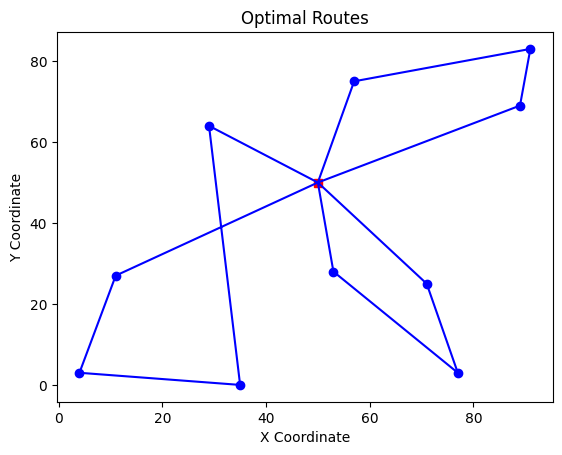

In [ ]:
# Running the Genetic Algorithm
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    toolbox.register("evaluate", evalVRP)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 30, stats=stats, halloffame=hof)
    #Refer eaSimple here - https://deap.readthedocs.io/en/master/api/algo.html
    return pop, stats, hof
if __name__ == "__main__":
    # Task 9 - Call the main function, run the algorithm and print the results
    final_population, stats, hof = main()
    # Print the best individual (optimal solution)
    print("Best individual (optimal solution):", hof[0])
    print("Fitness of the best individual:", hof[0].fitness.values)
    # Visualize the best solution
    plot_routes(hof[0], title="Optimal Routes")